In [110]:
import yfinance as yf
import matplotlib 
import sklearn

sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,0.0,0.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,0.0,0.0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,0.0,0.0


In [111]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00',
               '2024-07-29 00:00:00-04:00', '2024-07-30 00:00:00-04:00',
               '2024-07-31 00:00:00-04:00', '2024-08-01 00:00:00-04:00',
               '2024-08-02 00:00:00-04:00', '2024-08-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24264, freq=None)

<Axes: xlabel='Date'>

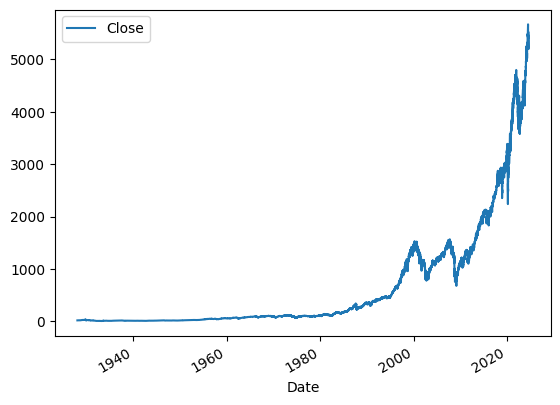

In [112]:
sp500.plot.line(y="Close", use_index=True)

In [113]:
del sp500["Dividends"] #Better for individual stocks, not needed here.
del sp500["Stock Splits"] #Clean data as reason stated above

In [114]:
sp500["Tomorrow"]= sp500["Close"].shift(-1) #Shows tomorrow's price on today using tomorrow's closing price.

In [115]:
sp500 #Initialize to see the changes we made

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059


In [116]:
# Based off tomorrow's price we can now set up a target to predict using previous data.
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # Is tomorrow's price greater than today's price?
# Returns 1 if it goes up, 0 if it goes down. Boolen turned into int to be used for ML.

In [117]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0


In [118]:
sp500 = sp500.loc["1990-01-01":].copy() # Only show data where data is at least in the 1990's + for more relevant data.

In [119]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0


In [120]:
from sklearn.ensemble import RandomForestClassifier # Picks up non linear relationships to better predict prices.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # Number of individual decision trees we train. Helps protect overfitting.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [121]:
from sklearn.metrics import precision_score # When we said the market would go up, did it actually go up?

preds = model.predict(test[predictors]) # generates prediction in the model

In [122]:
import pandas as pd
preds = pd.Series(preds, index = test.index) #turn the array into a series using the index from our test data set

In [123]:
precision_score(test["Target"], preds) #calculates precision score using the actual target and predicted target

np.float64(0.5384615384615384)

In [124]:
combined = pd.concat([test["Target"], preds], axis=1) # Combine actual and predicted values using PANDAS concat. 

<Axes: xlabel='Date'>

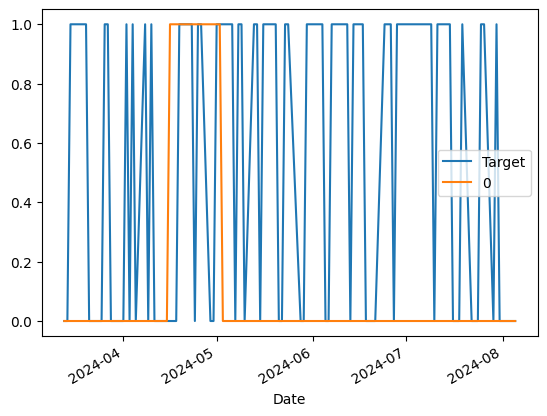

In [125]:
combined.plot()

In [126]:
# creates a prediction under one function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [127]:
# Takes in data, ML model, predictors. Start designates the amount of data we are working with. 250 trading days * 10 = 10 years of data
def backtest(data, model, predictors, start=2500, step=250): # step trains model for a year then another, then another, then etc.
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [128]:
#backtest 
predictions = backtest(sp500, model, predictors)

In [129]:
predictions = backtest(sp500, model, predictors)

In [130]:
# We can now test the errors
predictions["Predictions"].value_counts()

Predictions
0    3618
1    2596
Name: count, dtype: int64

In [131]:
precision_score(predictions["Target"], predictions["Predictions"]) # When we say the market would go up, it went up 53% of the time

np.float64(0.5288906009244992)

In [132]:
# We see when it went up and when it goes down
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535082
0    0.464918
Name: count, dtype: float64

In [133]:
# Rolling averages. Gives algorithm more data to make better predictions
horizons = [2, 5, 60, 250, 1000]
new_predictors = []
# Loop the horizons then calculate a rolling average against the horizon.
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # Close price / rolling average. Adds close ratio column to our sp500 dataset.
    # of days in the horizon where price went up
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # Looks at last few days and finds the sum of the target

    new_predictors += [ratio_column, trend_column]

In [135]:
sp500 = sp500.dropna() # Pandas cannot find enough rows to find a rolling average resulting in NaN
# Trend cannot include current day because it will include current day's target, resulting in leakage.

In [137]:
sp500 # Now starts in 1993 because we need 4 years of data to compute the ratios.

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5436.439941,0,1.000406,2.0,1.000475,2.0,1.012012,39.0,1.121462,140.0,1.275940,529.0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1,0.997514,1.0,0.999881,2.0,1.005836,38.0,1.115112,140.0,1.268992,528.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0,1.007835,1.0,1.012129,3.0,1.020480,38.0,1.131787,141.0,1.288381,528.0


In [139]:
# Improve predictor using more trees and less sample splits.
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1) 

In [141]:
# Same method but instead predicts probability for our booleans of 0/1.
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1 # Greater than 60% chance to go up
    preds[preds < .6] = 0 # Less than 60% of going up
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [142]:
# Ratio is the only value needed to train model
predictions = backtest(sp500, model, new_predictors)

In [143]:
predictions["Predictions"].value_counts()

Predictions
0.0    4374
1.0     839
Name: count, dtype: int64

In [146]:
# When we buy a stock, it has a 57% chance of going up according to our ML model.
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5744934445768772)